# 📊 Sales Data Analysis
This notebook demonstrates data manipulation and visualization using **pandas**, **matplotlib.pyplot**, and **matplotlib.dates**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('sales_data.csv', parse_dates=['Date'])
df.head()

,Date,Product,Units Sold,Unit Price,Revenue
0,2024-01-01,Widget A,47,64.31,3022.57
1,2024-01-02,Widget A,55,70.14,3857.70
2,2024-01-03,Widget A,42,65.75,2761.50
3,2024-01-04,Widget A,52,51.71,2688.92
4,2024-01-05,Widget A,58,44.18,2562.44


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        612 non-null    datetime64[ns]
 1   Product     612 non-null    object        
 2   Units Sold  612 non-null    int64         
 3   Unit Price  612 non-null    float64       
 4   Revenue     612 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.0+ KB


In [13]:
df.describe()

,Date,Units Sold,Unit Price,Revenue
count,612,612.000000,612.000000,612.000000
mean,2024-03-17 00:00:00,49.723856,54.815049,2716.706503
min,2024-01-01 00:00:00,29.000000,10.290000,499.050000
25%,2024-02-08 00:00:00,44.000000,32.222500,1507.312500
50%,2024-03-17 00:00:00,50.000000,55.975000,2683.820000
75%,2024-04-24 00:00:00,54.250000,76.565000,3673.065000
max,2024-06-01 00:00:00,72.000000,99.850000,6598.470000
std,NaN,7.461010,25.781978,1349.326800


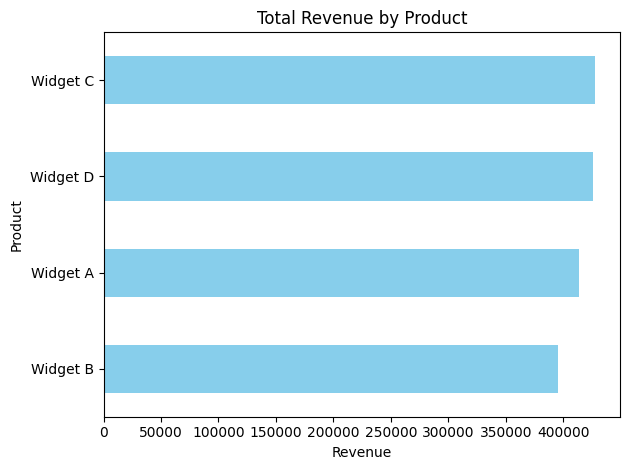

In [14]:
revenue_by_product = df.groupby('Product')['Revenue'].sum().sort_values()
revenue_by_product.plot(kind='barh', title='Total Revenue by Product', color='skyblue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

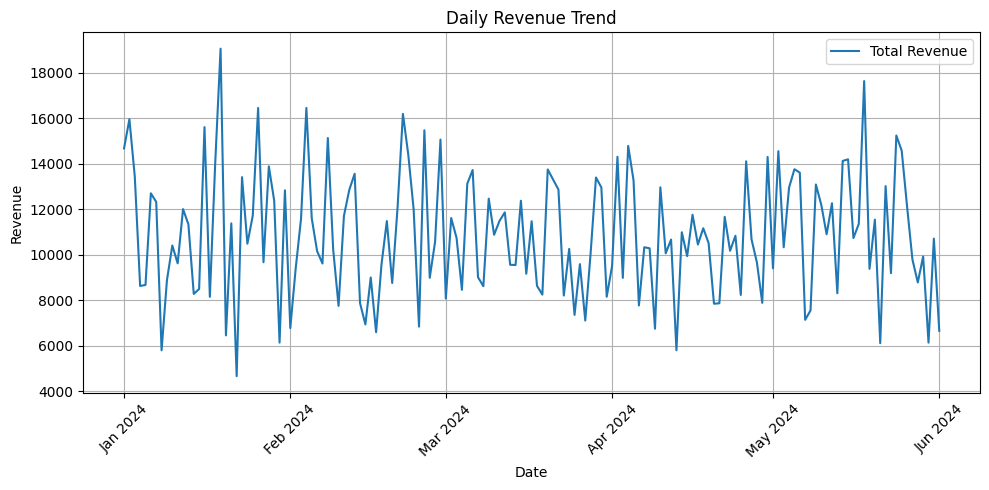

In [15]:
daily_revenue = df.groupby('Date')['Revenue'].sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_revenue.index, daily_revenue.values, label='Total Revenue')
ax.set_title('Daily Revenue Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

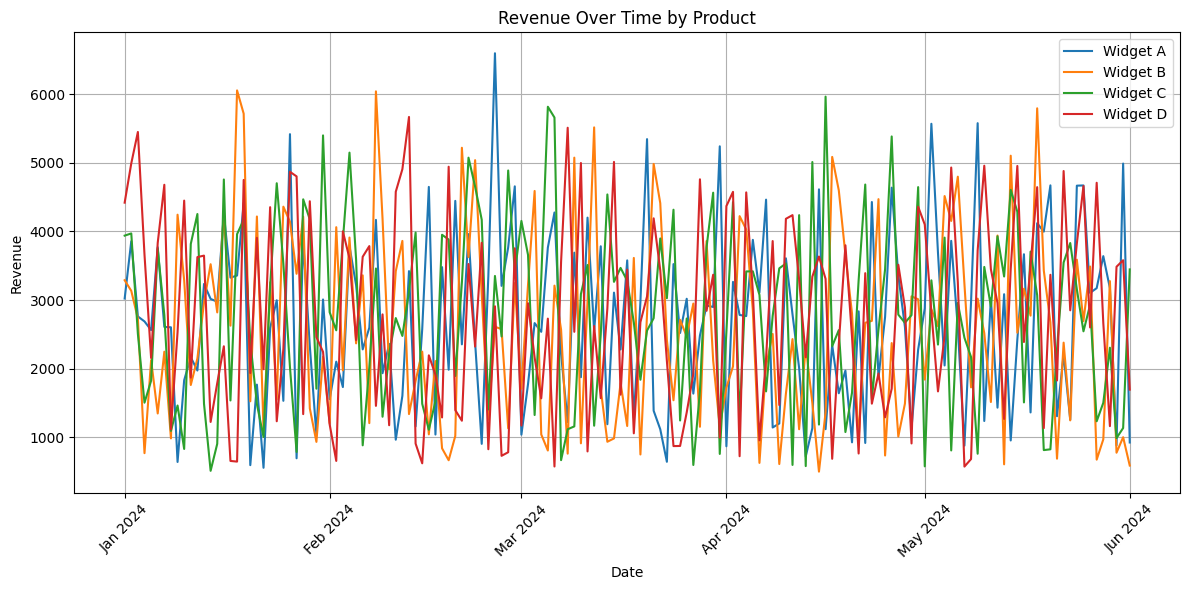

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
for product in df['Product'].unique():
    product_data = df[df['Product'] == product].groupby('Date')['Revenue'].sum()
    ax.plot(product_data.index, product_data.values, label=product)
ax.set_title('Revenue Over Time by Product')
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 🧹 Data Cleaning and Transformation

In [17]:
# Check for missing values
df.isna().sum()

Date          0
Product       0
Units Sold    0
Unit Price    0
Revenue       0
dtype: int64

In [18]:
# Add a new column for weekday
df['Weekday'] = df['Date'].dt.day_name()

# Use .assign to add profit (example: assume fixed cost per unit)
df = df.assign(CostPerUnit=20, Profit=lambda d: d['Revenue'] - d['CostPerUnit'] * d['Units Sold'])
df.head()

,Date,Product,Units Sold,Unit Price,Revenue,Weekday,CostPerUnit,Profit
0,2024-01-01,Widget A,47,64.31,3022.57,Monday,20,2082.57
1,2024-01-02,Widget A,55,70.14,3857.70,Tuesday,20,2757.70
2,2024-01-03,Widget A,42,65.75,2761.50,Wednesday,20,1921.50
3,2024-01-04,Widget A,52,51.71,2688.92,Thursday,20,1648.92
4,2024-01-05,Widget A,58,44.18,2562.44,Friday,20,1402.44


## 📊 Aggregations and Pivot Tables

In [19]:
# Pivot table: Total Revenue by Product and Month
df['Month'] = df['Date'].dt.to_period('M')
pivot = df.pivot_table(values='Revenue', index='Month', columns='Product', aggfunc='sum')
pivot

Product,Widget A,Widget B,Widget C,Widget D
Month,,,,
2024-01,81461.41,88342.77,83951.66,93700.15
2024-02,82248.49,76476.89,86729.45,73063.83
2024-03,82756.46,75900.65,88082.13,79239.87
2024-04,73185.85,70156.26,88574.94,81541.05
2024-05,93129.50,83610.78,77215.91,96602.69
2024-06,924.07,587.77,3447.36,1694.44


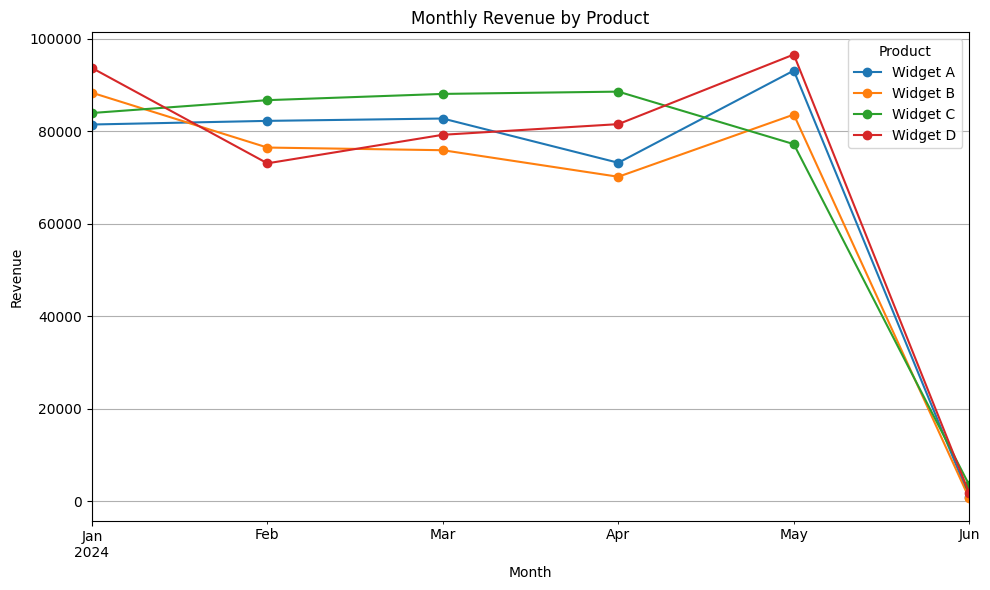

In [20]:
# Plot the pivot table
pivot.plot(figsize=(10, 6), marker='o', title='Monthly Revenue by Product')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Rolling Averages

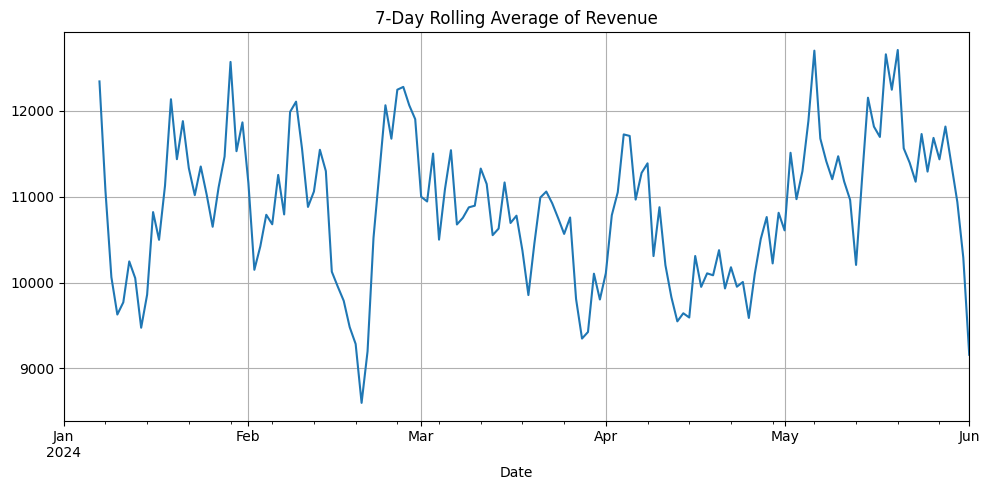

In [21]:
# Rolling average of revenue
rolling_avg = df.groupby('Date')['Revenue'].sum().rolling(window=7).mean()
rolling_avg.plot(figsize=(10, 5), title='7-Day Rolling Average of Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧮 Value Counts and Crosstab

In [22]:
# How often is each product sold per weekday?
pd.crosstab(df['Weekday'], df['Product'])

Product,Widget A,Widget B,Widget C,Widget D
Weekday,,,,
Friday,22,22,22,22
Monday,22,22,22,22
Saturday,22,22,22,22
Sunday,21,21,21,21
Thursday,22,22,22,22
Tuesday,22,22,22,22
Wednesday,22,22,22,22


In [23]:
# Value counts for weekday sales frequency
df['Weekday'].value_counts().sort_index()

Weekday
Friday       88
Monday       88
Saturday     88
Sunday       84
Thursday     88
Tuesday      88
Wednesday    88
Name: count, dtype: int64